In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the csv

day_data = pd.read_csv("data/day.csv")
hour_data = pd.read_csv("data/hour.csv")

In [3]:
# Making a copy of the data frames

dd = day_data.copy()
hd = hour_data.copy()

In [4]:
print(dd.shape)
print(hd.shape)

(731, 16)
(17379, 17)


In [5]:
display(dd.head(10))
display(hd.head(10))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [6]:
# Dropping some columns

dd.drop(['instant', 'yr', 'mnth', 'season', 'weathersit'], axis=1, inplace=True)
hd.drop(['instant', 'yr', 'mnth', 'season', 'weathersit'], axis=1, inplace=True)

In [7]:
# Renaming the columns

dd.rename(columns={'dteday': 'date', 'cnt': 'count'}, inplace=True)
hd.rename(columns={'dteday': 'date', 'hr': 'hour',
          'cnt': 'count'}, inplace=True)

In [8]:
print(dd.dtypes)
print(hd.dtypes)

date           object
holiday         int64
weekday         int64
workingday      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object
date           object
hour            int64
holiday         int64
weekday         int64
workingday      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [9]:
# Convertin strings to pandas datetime object

dd["date"] = pd.to_datetime(dd["date"])
hd["date"] = pd.to_datetime(hd["date"])

In [10]:
# Unnormalizing the values
# x_n * (x_max - x_min) + x_min = x

dd['temp'] = dd['temp'] * (39 + 8) - 8
dd['atemp'] = dd['atemp'] * (50 + 16) - 16
dd['hum'] = dd['hum'] * (100)
dd['windspeed'] = dd['windspeed'] * 67

hd['temp'] = hd['temp'] * (39 + 8) - 8
hd['atemp'] = hd['atemp'] * (50 + 16) - 16
hd['hum'] = hd['hum'] * (100)
hd['windspeed'] = hd['windspeed'] * 67

In [11]:
# Converting binary values to boolean

dd["workingday"] = dd["workingday"].astype("bool")
hd["workingday"] = hd["workingday"].astype("bool")
dd["holiday"] = dd["holiday"].astype("bool")
hd["holiday"] = hd["holiday"].astype("bool")

In [12]:
# Checking for 0 values

print((dd["temp"][dd["temp"] == 0]).count())
print((dd["atemp"][dd["atemp"] == 0]).count())
print((dd["hum"][dd["hum"] == 0]).count())
print((dd["windspeed"][dd["windspeed"] == 0]).count())

0
0
1
0


In [13]:
print((hd["temp"][hd["temp"] == 0]).count())
print((hd["atemp"][hd["atemp"] == 0]).count())
print((hd["hum"][hd["hum"] == 0]).count()) 
print((hd["windspeed"][hd["windspeed"] == 0]).count())

0
0
22
2180


In [14]:
# Checking for NaN values
print(dd.isna().sum())
print(hd.isna().sum())

date          0
holiday       0
weekday       0
workingday    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
date          0
hour          0
holiday       0
weekday       0
workingday    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [15]:
# Checking if the count is correct

print((dd["count"] == dd["registered"] + dd["casual"]).count() == dd.shape[0])
print((hd["count"] == hd["registered"] + hd["casual"]).count() == hd.shape[0])

True
True


In [16]:
def categorize_season(date):
    '''Function for getting season from month'''
    month = date.month
    if 2 < month < 6:
        return 'Spring'
    if 5 < month < 9:
        return 'Summer'
    if 8 < month < 12:
        return 'Fall'
    else:
        return 'Winter'

In [ ]:
weekdays = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

In [17]:
# Convert season column to categorical format

dd['season'] =  pd.Categorical(dd['date'].apply(categorize_season))
hd['season'] =  pd.Categorical(hd['date'].apply(categorize_season))
dd['weekday'] = pd.Categorical(dd['date'].dt.day_name(), categories=weekdays, ordered=True)
hd['weekday'] = pd.Categorical(hd['date'].dt.day_name(), categories=weekdays, ordered=True)

In [18]:
# Convert the values from numbers to string

dd["month"] = dd["date"].dt.month_name()
hd["month"] = hd["date"].dt.month_name()

In [19]:
# Combine 'date' and 'hour' columns into 'datetime' column

hd['datetime'] = hd['date'] + hd['hour'].astype('timedelta64[h]')
hd.drop('date', axis=1, inplace=True)


In [20]:
# Getting the humidity data from Historical Weather API
# Making a request 

import json
import requests
response = requests.get(url="https://archive-api.open-meteo.com/v1/archive?latitude=38.8951&longitude=-77.0364&start_date=2011-01-01&end_date=2012-12-31&hourly=relativehumidity_2m,rain,snowfall&daily=rain_sum,snowfall_sum&timezone=America%2FNew_York")
response.raise_for_status()

In [21]:
# Reading json and converting it to DataFrame

api_data = pd.read_json(response.text)
hourly_time = pd.to_datetime(pd.Series(api_data['hourly'][0]))
hourly_hum = pd.Series(api_data['hourly'][1]) 
hourly_rain = pd.Series(api_data['hourly'][2])
hourly_snow = pd.Series(api_data['hourly'][3])
daily_time = pd.to_datetime(pd.Series(api_data['daily'][0]))
daily_rain = pd.Series(api_data['daily'][4])
daily_snow = pd.Series(api_data['daily'][5])
hour_frame = {
    'datetime': hourly_time,
    'humidity': hourly_hum,
    'rain': hourly_rain,
    'snow': hourly_snow

}
day_frame = {
    'date': daily_time,
    'rain': daily_rain,
    'snow': daily_snow
}                         
api_hour_data = pd.DataFrame(hour_frame)
api_day_data = pd.DataFrame(day_frame)
display(api_hour_data)
display(api_day_data)    

,datetime,humidity,rain,snow
0,2011-01-01 00:00:00,93,0.0,0.0
1,2011-01-01 01:00:00,94,0.0,0.0
2,2011-01-01 02:00:00,96,0.0,0.0
3,2011-01-01 03:00:00,96,0.0,0.0
4,2011-01-01 04:00:00,98,0.0,0.0
...,...,...,...,...
17539,2012-12-31 19:00:00,54,0.0,0.0
17540,2012-12-31 20:00:00,54,0.0,0.0
17541,2012-12-31 21:00:00,54,0.0,0.0
17542,2012-12-31 22:00:00,55,0.0,0.0


,date,rain,snow
0,2011-01-01,2.5,0.00
1,2011-01-02,3.0,0.00
2,2011-01-03,0.0,0.00
3,2011-01-04,0.0,0.00
4,2011-01-05,0.0,0.00
...,...,...,...
726,2012-12-27,1.6,0.00
727,2012-12-28,0.0,0.00
728,2012-12-29,2.7,2.87
729,2012-12-30,0.0,0.00


In [22]:
# Looking for missing hours in the original hour data

start_date = hd['datetime'].min()
end_date = hd['datetime'].max()
continuous_range = pd.date_range(start=start_date, end=end_date, freq='H')
missing_hours = continuous_range[~continuous_range.isin(hd['datetime'])]
display(missing_hours)

DatetimeIndex(['2011-01-02 05:00:00', '2011-01-03 02:00:00',
               '2011-01-03 03:00:00', '2011-01-04 03:00:00',
               '2011-01-05 03:00:00', '2011-01-06 03:00:00',
               '2011-01-07 03:00:00', '2011-01-11 03:00:00',
               '2011-01-11 04:00:00', '2011-01-12 03:00:00',
               ...
               '2012-10-30 07:00:00', '2012-10-30 08:00:00',
               '2012-10-30 09:00:00', '2012-10-30 10:00:00',
               '2012-10-30 11:00:00', '2012-10-30 12:00:00',
               '2012-11-08 03:00:00', '2012-11-29 03:00:00',
               '2012-12-24 04:00:00', '2012-12-25 03:00:00'],
              dtype='datetime64[ns]', length=165, freq=None)

In [23]:
# Merging the original dataset with the retreived weather data

hd = pd.merge(hd, api_hour_data, how='inner', on='datetime')
dd = pd.merge(dd, api_day_data, how='inner', on='date')

In [24]:
dd.head()

,date,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,count,season,month,rain,snow
0,2011-01-01,False,Saturday,False,8.175849,7.999250,80.5833,10.749882,331,654,985,Winter,January,2.5,0.0
1,2011-01-02,False,Sunday,False,9.083466,7.346774,69.6087,16.652113,131,670,801,Winter,January,3.0,0.0
2,2011-01-03,False,Monday,True,1.229108,-3.499270,43.7273,16.636703,120,1229,1349,Winter,January,0.0,0.0
3,2011-01-04,False,Tuesday,True,1.400000,-1.999948,59.0435,10.739832,108,1454,1562,Winter,January,0.0,0.0
4,2011-01-05,False,Wednesday,True,2.666979,-0.868180,43.6957,12.522300,82,1518,1600,Winter,January,0.0,0.0


In [25]:
# Replacing humidity values with new ones and leaving one humidity column

hd['hum'] = hd['humidity']
hd.drop('humidity', axis=1, inplace=True)

In [26]:
# Replacing humidity values in day data with the average of the day humidity from hour data 

dd['hum'] = np.round(hd.groupby(hd['datetime'].dt.date)['hum'].mean().values, 2)
dd.head()

,date,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,count,season,month,rain,snow
0,2011-01-01,False,Saturday,False,8.175849,7.999250,92.33,10.749882,331,654,985,Winter,January,2.5,0.0
1,2011-01-02,False,Sunday,False,9.083466,7.346774,75.09,16.652113,131,670,801,Winter,January,3.0,0.0
2,2011-01-03,False,Monday,True,1.229108,-3.499270,42.82,16.636703,120,1229,1349,Winter,January,0.0,0.0
3,2011-01-04,False,Tuesday,True,1.400000,-1.999948,58.09,10.739832,108,1454,1562,Winter,January,0.0,0.0
4,2011-01-05,False,Wednesday,True,2.666979,-0.868180,59.74,12.522300,82,1518,1600,Winter,January,0.0,0.0


In [27]:
# Creating a new columns israin, issnow where True means rain > 0, snow > 0 

hd['israin'] = (hd['rain'] > 0)
hd['issnow'] = (hd['snow'] > 0)

In [28]:
dd['israin'] = (dd['rain'] > 0)
dd['issnow'] = (dd['snow'] > 0)

In [29]:
# Setting the default parameters for seaborn plots

sns.set_theme()
sns.set_style('darkgrid')
sns.set(rc={
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'axes.titlepad': 10,
    'xtick.labelsize': 10,
    'xtick.color': 'grey',
    'ytick.labelsize': 10,
    'ytick.color': 'grey',
    'axes.titlecolor': 'black',
    "figure.dpi":100, 
    'savefig.dpi':200,
    }) 
colors = ['#b55d60', '#cc8963', '#5975a4', '#5f9e6e', '#857aab', '#60c1d1']
colors_saturated = ['#d62728', '#ff7f0e', '#1f77b4', '#2ca02c', '#9467bd', '#17becf']

In [30]:
def convert_to_k(ax):
    '''Function for converting ylabels count from thousands to k'''
    ylabels = ["{:,.0f}".format(y) + "K" for y in ax.get_yticks() / 1000]
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ylabels)

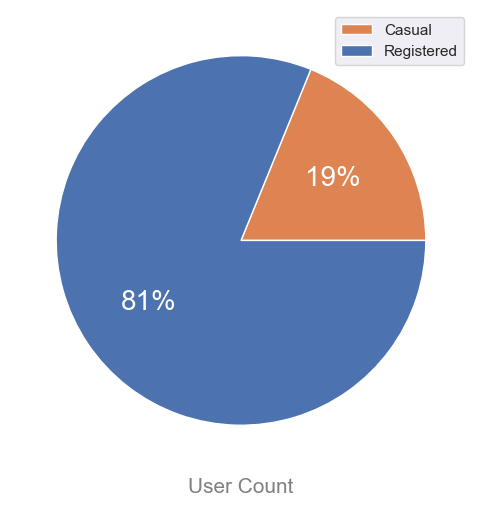

In [31]:
# Casual and Registered count distribution Pie Chart

fig, ax = plt.subplots(figsize=(6, 6))

labels = ['Casual', 'Registered']
users = [dd['casual'].sum(), dd['registered'].sum()]
plt.pie(users, autopct='%.0f%%', textprops={'fontsize': 20, 'color': 'w'}, colors=["#dd8452", "#4c72b0"])
plt.legend(labels=labels)
plt.xlabel('User Count')
plt.show()

In [88]:
count_sum_2011 = dd[dd['date'].dt.year == 2011]['count'].sum()
count_sum_2012 = dd[dd['date'].dt.year == 2012]['count'].sum()
print(count_sum_2011, count_sum_2012)

1243103 2049576


In [87]:
count_month_mean_2011 = round(dd[dd['date'].dt.year == 2011].groupby('month')['count'].sum().mean(), 0)
count_month_mean_2012 = dd[dd['date'].dt.year == 2012].groupby('month')['count'].sum().mean()
count_month_mean_delta = round(count_month_mean_2011 / count_month_mean_2012, 3)
print(count_month_mean_2011, count_month_mean_2012, count_month_mean_delta)

103592.0 170798.0 0.607


Text(0.5, 0, 'Month')

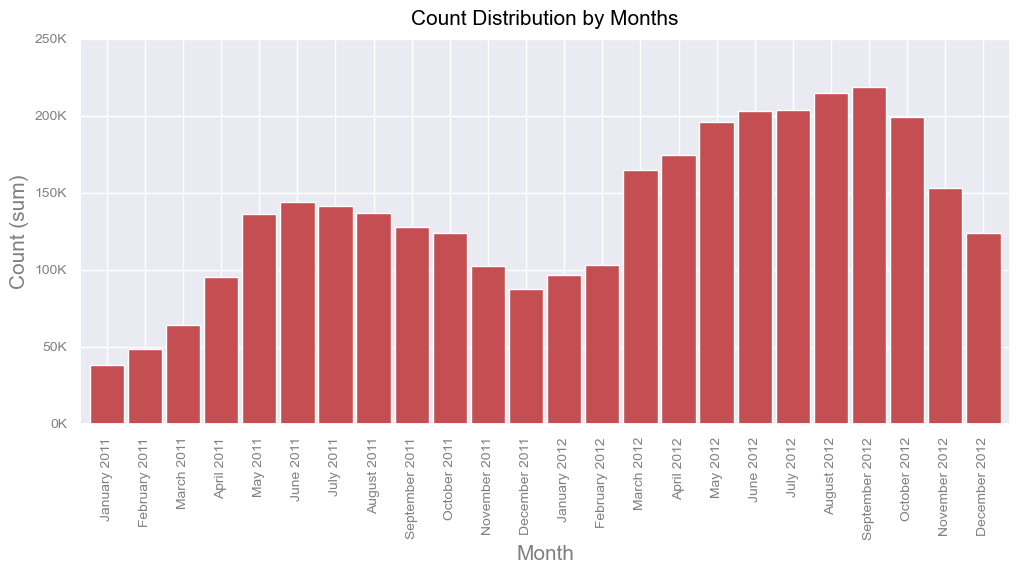

In [39]:
# Count Distribution by Months Plot

fig, ax = plt.subplots(figsize=(12, 5))

months = dd.groupby(pd.Grouper(key="date", freq='M'))
months["count"].sum().plot(
    kind="bar", 
    width=0.9,
    color='r',
    ax=ax
)
convert_to_k(ax)

xlabels = [m.strftime('%B %Y') for m, g in months]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
plt.xticks(rotation=90)
plt.title('Count Distribution by Months')
plt.ylabel("Count (sum)")
plt.xlabel("Month")
plt.show()

Text(0.5, 0, 'Day')

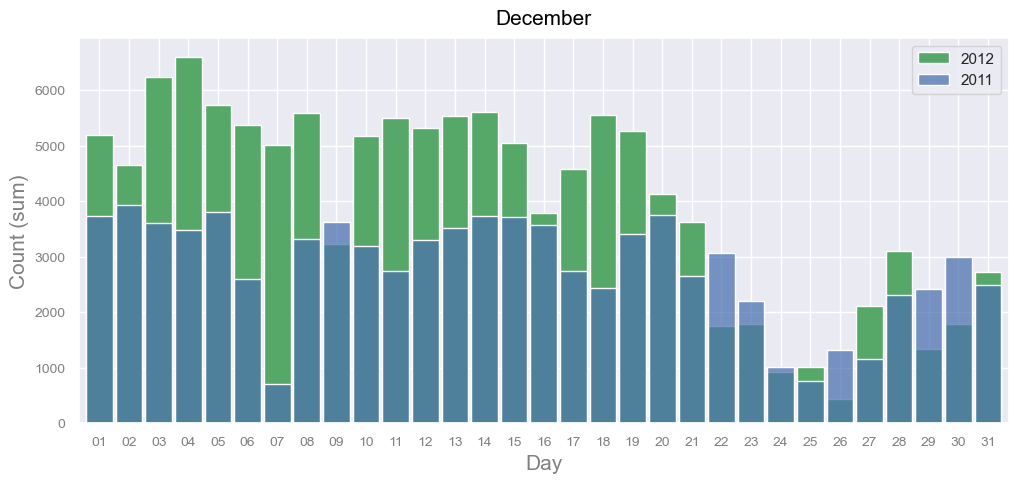

In [40]:
# Count per Day for one Month

import calendar

fig, ax = plt.subplots(figsize=(12, 5))

month = 12
days1 = dd[(dd['date'].dt.month == month) & (dd['date'].dt.year == 2011)].groupby(pd.Grouper(key="date", freq='D'))
days2 = dd[(dd['date'].dt.month == month) & (dd['date'].dt.year == 2012)].groupby(pd.Grouper(key="date", freq='D'))
days2["count"].sum().plot(
    kind="bar", 
    width=0.9,
    color='g',
    label='2012',
    ax=ax,
)
days1["count"].sum().plot(
    kind="bar", 
    width=0.9,
    color='#4c72b0bc',
    label='2011',
    ax=ax,
)

xlabels = [d.strftime('%d') for d, g in days1]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
plt.xticks(rotation=0)
plt.title(calendar.month_name[month])
plt.legend()
plt.ylabel("Count (sum)")
plt.xlabel("Day")
plt.show()

Text(0.5, 0, 'Hour')

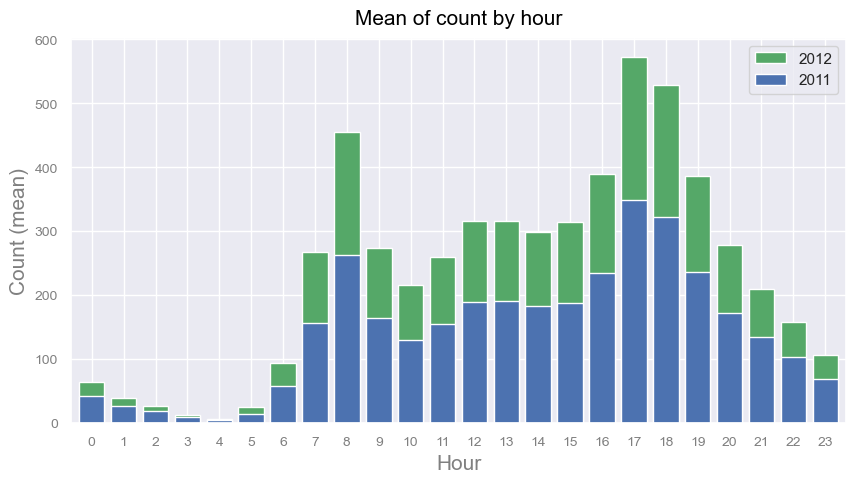

In [44]:
# Mean of count by hour Plot

fig, ax = plt.subplots(figsize=(10, 5))

hd[hd['datetime'].dt.year == 2012].groupby("hour", sort=False)["count"].mean().plot(
    kind="bar", width=0.8, color="g", label='2012', ax=ax
)
hd[hd['datetime'].dt.year == 2011].groupby("hour", sort=False)["count"].mean().plot(
    kind="bar", width=0.8, color="b", label='2011', ax=ax
)

plt.title("Mean of count by hour")
plt.xticks(rotation=0)
plt.legend()
plt.ylabel("Count (mean)")
plt.xlabel("Hour")
plt.show()

Text(0.5, 0, 'Hour')

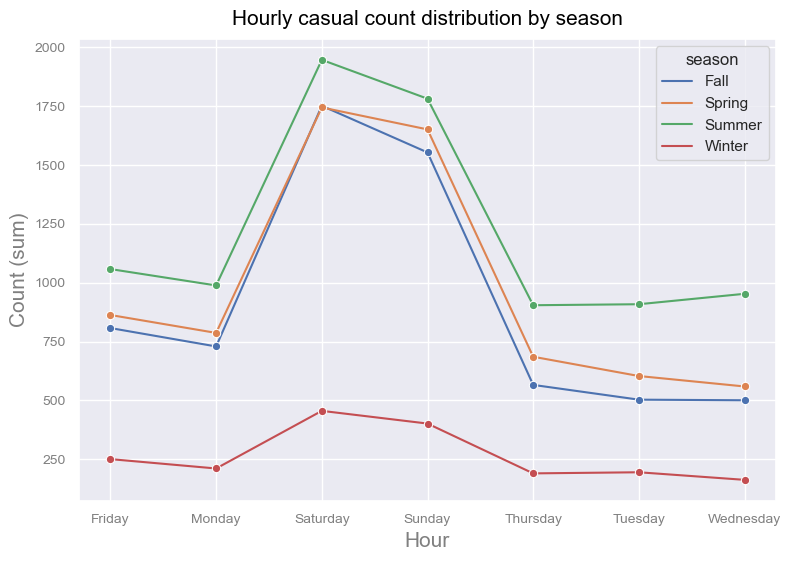

In [45]:
# Weekday casual count distribution by season

fig, ax = plt.subplots(figsize=(9, 6))

sns.lineplot(
    data=dd,
    x="weekday",
    y="casual",
    estimator="mean",
    hue='season',
    errorbar=None,
    marker='o',
    ax=ax,
)

plt.title("Weekday casual count distribution by season")
plt.ylabel("Count (sum)")
plt.xlabel("Hour")
plt.show()

Text(0.5, 0, 'Hour')

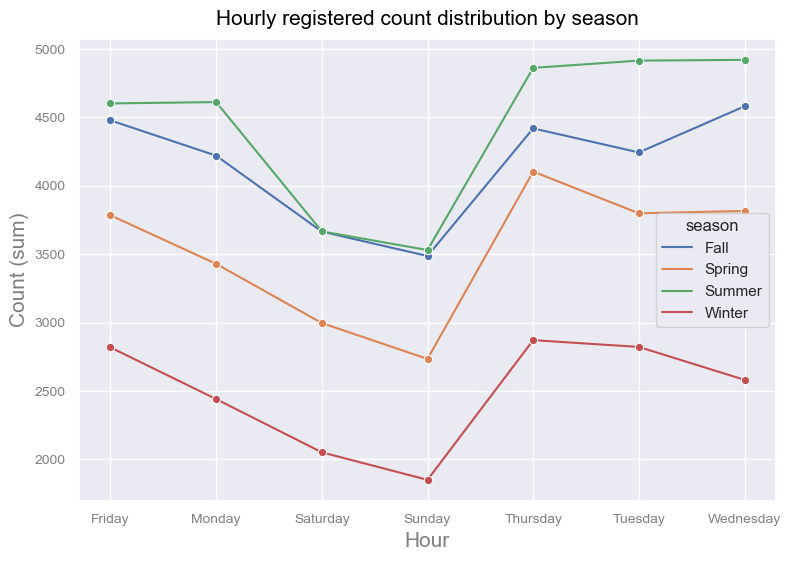

In [46]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.lineplot(
    data=dd,
    x="weekday",
    y="registered",
    estimator="mean",
    hue='season',
    errorbar=None,
    marker='o',
    ax=ax,
)

plt.title("Weekday registered count distribution by season")
plt.ylabel("Count (sum)")
plt.xlabel("Hour")
plt.show()

Text(0.5, 0, 'Hour')

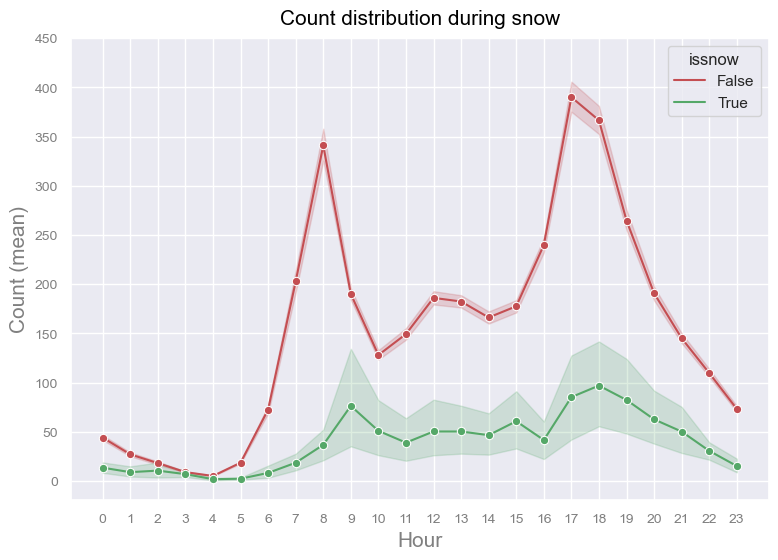

In [49]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="registered",
    hue='issnow',
    palette=['r', 'g'],
    estimator="mean",
    marker='o',
    ax=ax,
)
# ax.set_yticks(np.arange(0, 300000, 25000))
# convert_to_k(ax)

ax.set_xticks(np.arange(0, 24, 1))
ax.set_yticks(np.arange(0, 500, 50))
plt.title("Count distribution during snow")
plt.ylabel("Count (mean)")
plt.xlabel("Hour")
plt.show()

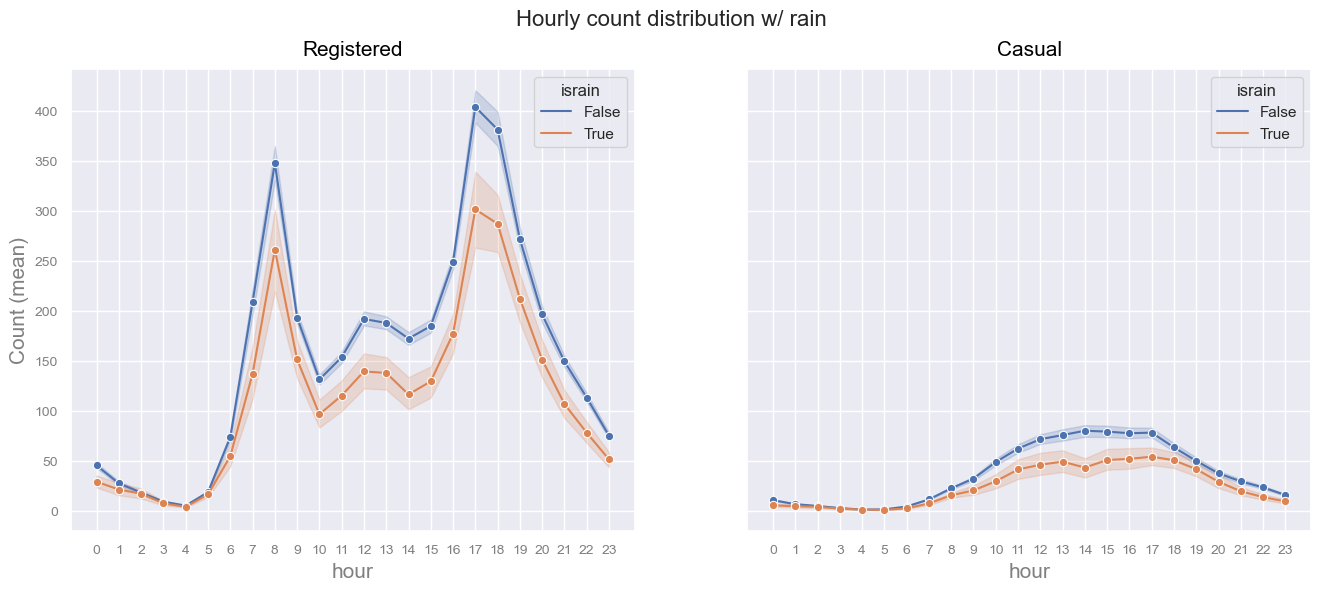

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.lineplot(
    data=hd,
    x="hour",
    y="registered",
    hue='israin',
    estimator="mean",
    # errorbar=None,
    marker='o',
    ax=ax[0],
)

ax[0].set_ylabel('Count (mean)')
ax[0].set_xticks(np.arange(0, 24, 1))
ax[0].set_title("Registered")
ax[0].set_yticks(np.arange(0, 450, 50))

sns.lineplot(
    data=hd,
    x="hour",
    y="casual",
    hue='israin',
    estimator="mean",
    # errorbar=None,
    marker='o',
    ax=ax[1],
)

fig.suptitle('Hourly count distribution w/ rain', fontsize=16)
ax[1].set_xticks(np.arange(0, 24, 1))
ax[1].set_title("Casual")
plt.show()

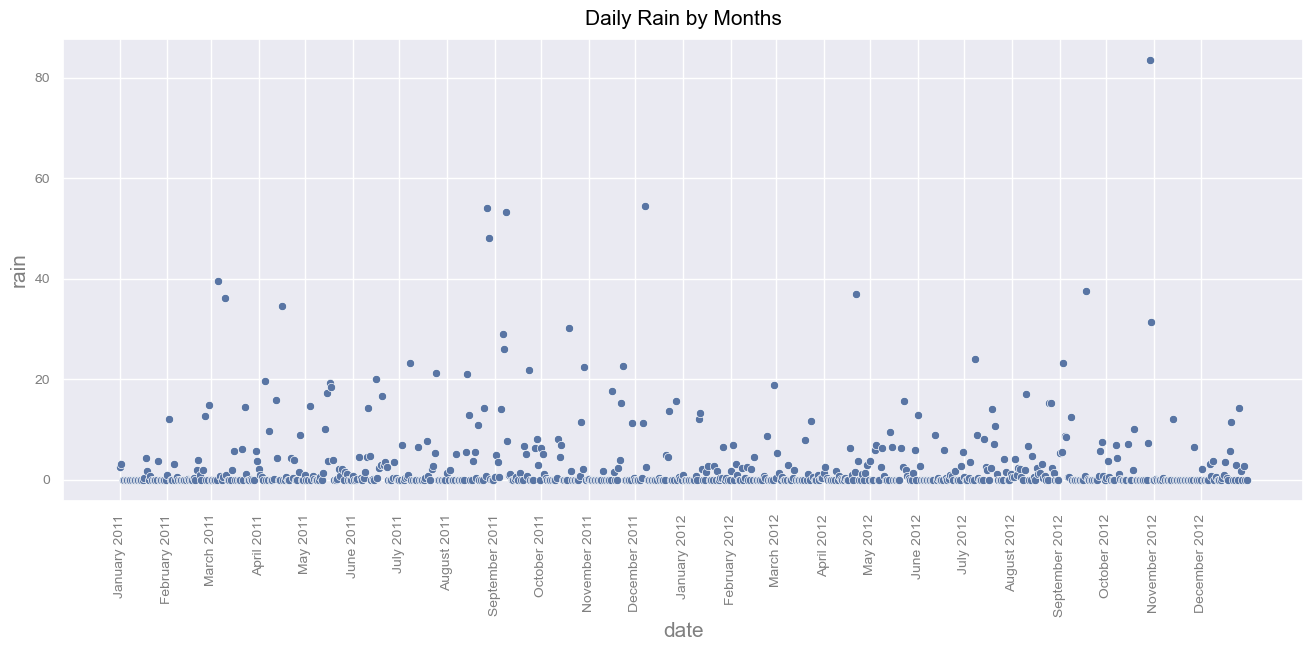

In [90]:
fig, ax = plt.subplots(figsize=(16, 6), sharey=True)

sns.scatterplot(
    data=dd,
    x=dd['date'],
    y="rain",
    color=colors[2],

    ax=ax,
)

xlabels = pd.date_range(start=dd['date'].min(), end=dd['date'].max(), freq='MS')
ax.set_xticks(xlabels)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%B %Y'))
plt.title('Daily Rain by Months')
plt.xticks(rotation=90)
plt.show()

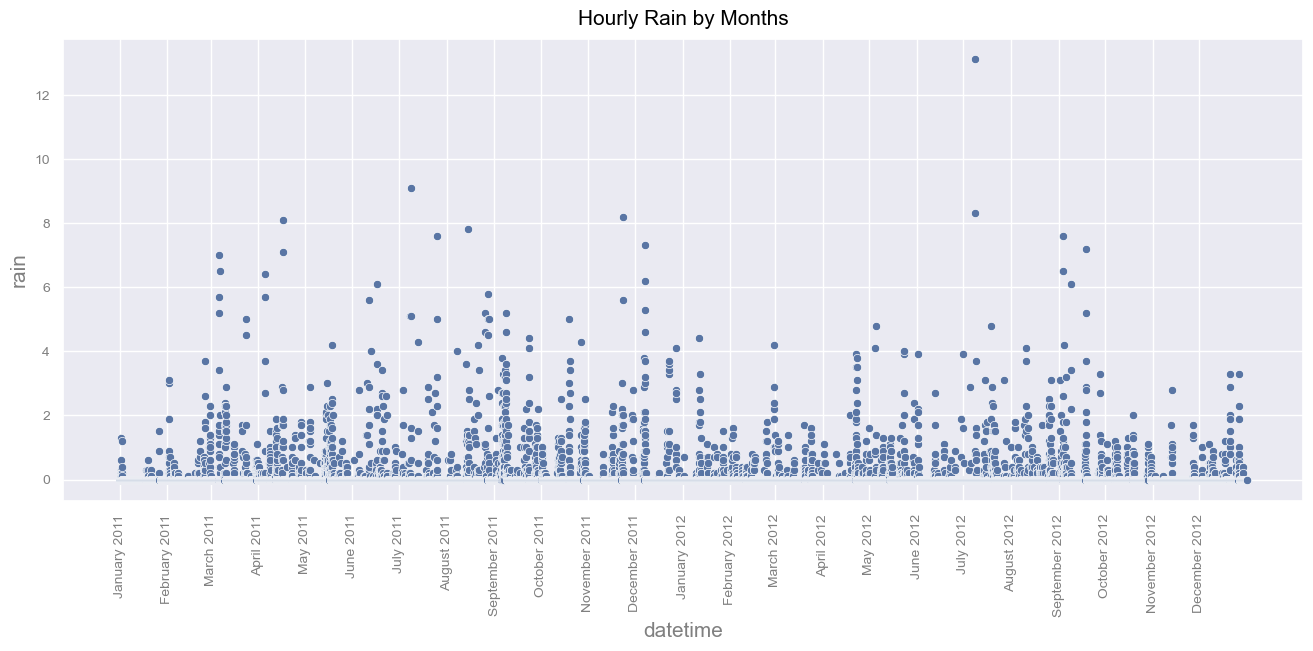

In [93]:
fig, ax = plt.subplots(figsize=(16, 6), sharey=True)

sns.scatterplot(
    data=hd,
    x=hd['datetime'],
    y="rain",
    color=colors[2],
    ax=ax,
)
xlabels = pd.date_range(start=hd['datetime'].min(), end=hd['datetime'].max(), freq='MS')
ax.set_xticks(xlabels)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%B %Y'))
plt.xticks(rotation=90)
plt.title('Hourly Rain by Months')
plt.show()

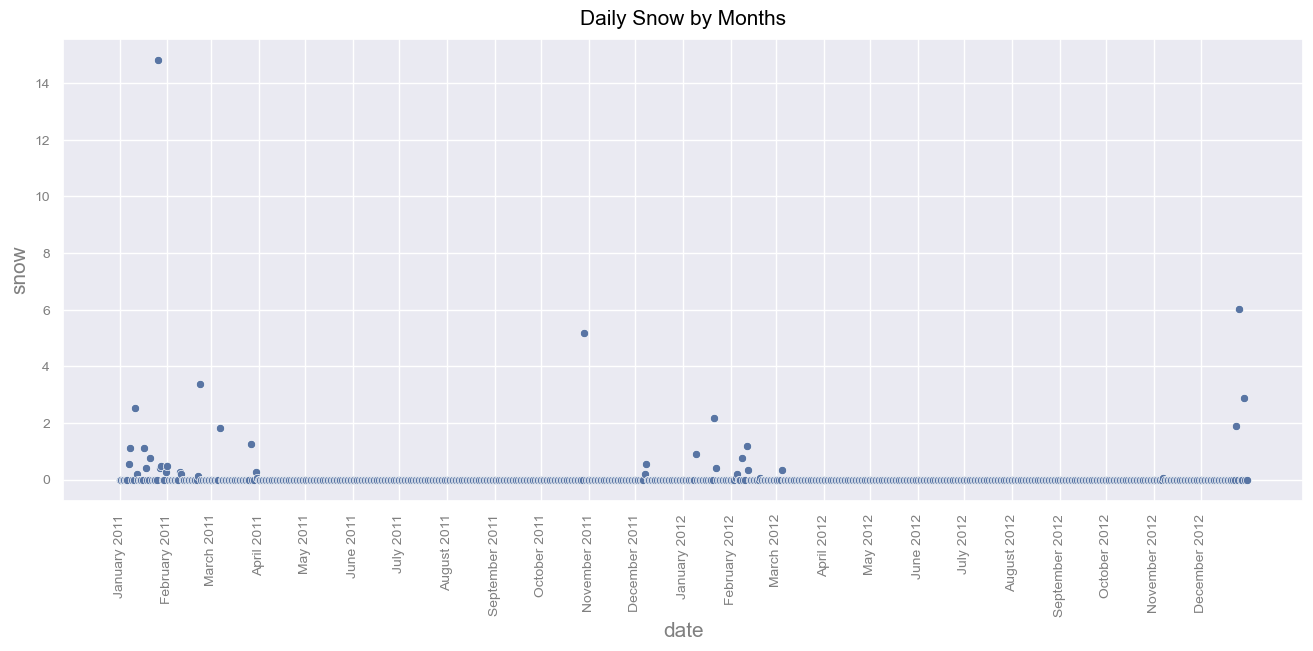

In [95]:
fig, ax = plt.subplots(figsize=(16, 6), sharey=True)

sns.scatterplot(
    data=dd,
    x=dd['date'],
    y="snow",

    color=colors[2],
    ax=ax,
)
xlabels = pd.date_range(start=dd['date'].min(), end=dd['date'].max(), freq='MS')
ax.set_xticks(xlabels)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%B %Y'))
plt.xticks(rotation=90)
plt.title('Daily Snow by Months')
plt.show()

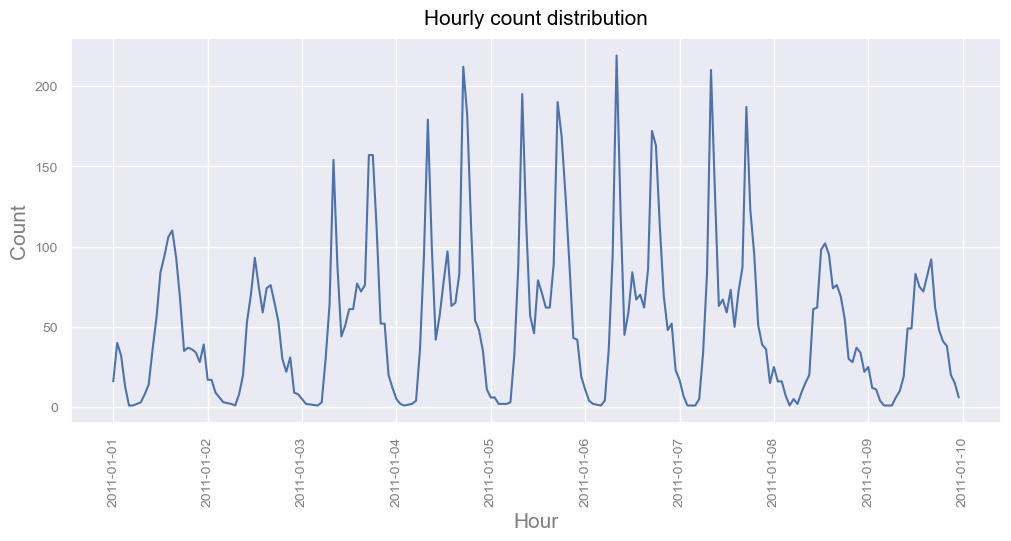

In [97]:
fig, ax = plt.subplots(figsize=(12, 5))

end='2011-01-10 00:00:00'

sns.lineplot(
    data=hd,
    x=hd[hd['datetime']<end]['datetime'],
    y="count",
    color="b",
    ax=ax,
)

ax.set_xticks(pd.date_range(start='2011-01-01 00:00:00', end=end, freq='D'))
plt.xticks(rotation=90)
plt.title("Hourly count distribution")
plt.ylabel("Count")
plt.xlabel("Hour")
plt.show()

Text(0.5, 0, 'Hour')

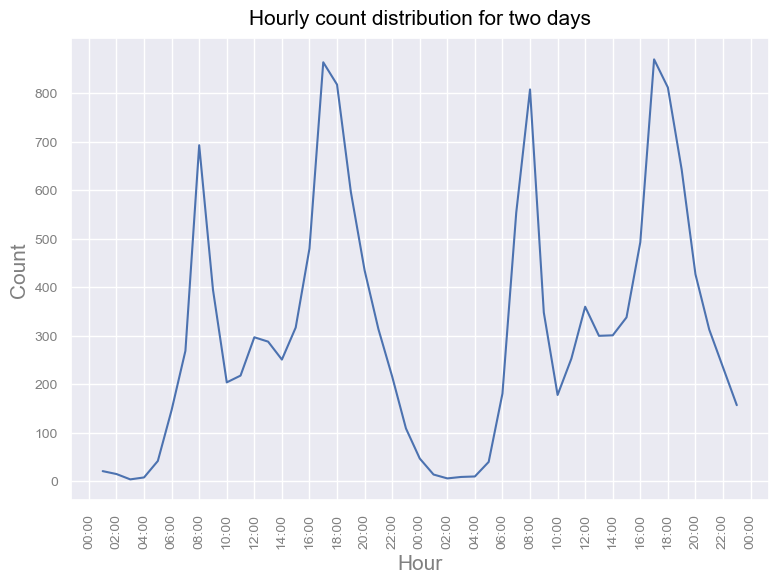

In [98]:
fig, ax = plt.subplots(figsize=(9, 6))
start = "2012-08-28 00:00:00"
end = "2012-08-30 00:00:00"
sns.lineplot(
    data=hd,
    x=hd[
        (hd["datetime"] < end)
        & (hd["datetime"] > start)
    ]["datetime"],
    y="count",
    color="b",
    ax=ax,
)

ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
ax.set_yticks(np.arange(0, 900, 100))
ax.set_xticks(pd.date_range(start=start, end=end, freq='2H'))
plt.title("Hourly count distribution for two days")
plt.xticks(rotation=90)

plt.ylabel("Count")
plt.xlabel("Hour")
plt.show()

Text(0.5, 0, 'Hour')

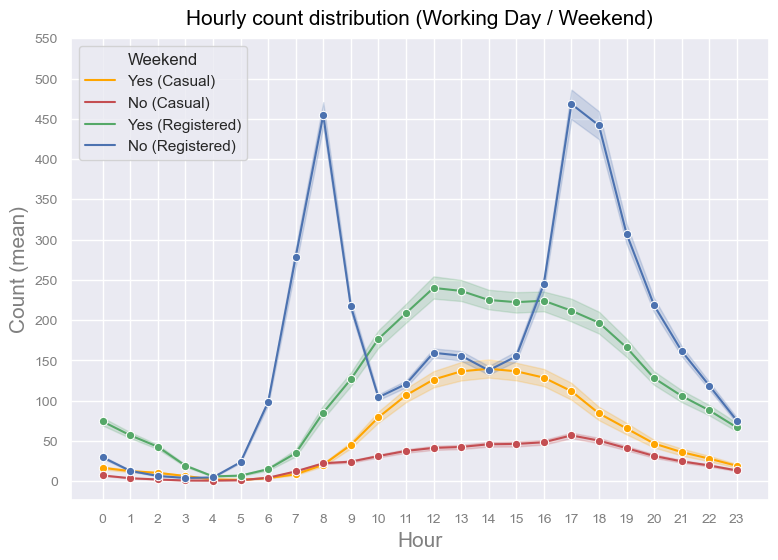

In [59]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="casual",
    estimator="mean",
    hue='workingday',
    palette=['orange', 'r'],
    marker='o',
    ax=ax,
)
sns.lineplot(
    data=hd,
    x="hour",
    y="registered",
    hue='workingday',
    palette=['g', 'b'],
    estimator="mean",
    marker='o',
    ax=ax,
)

ax.set_yticks(np.arange(0, 600, 50))
ax.set_xticks(np.arange(0, 24, 1))

L = ax.legend(title='Weekend')
[L.get_texts()[i].set_text(['Yes (Casual)', 'No (Casual)', 'Yes (Registered)', 'No (Registered)'][i]) for i in range(4)]

plt.title("Hourly count distribution (Working Day / Weekend)")
plt.ylabel("Count (mean)")
plt.xlabel("Hour")
plt.show()

Text(0.5, 0, 'Hour')

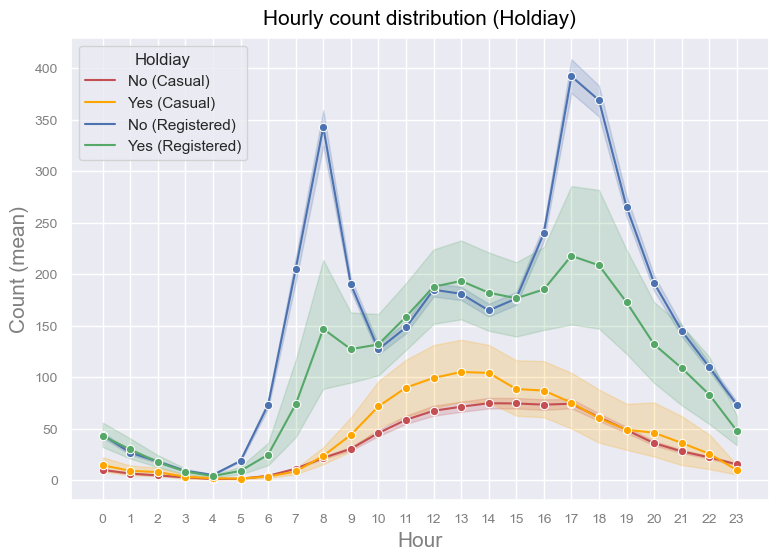

In [60]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(
    data=hd,
    x="hour",
    y="casual",
    estimator="mean",
    hue='holiday',
    palette=['r', 'orange'],
    marker='o',
    ax=ax,
)
sns.lineplot(
    data=hd,
    x="hour",
    y="registered",
    hue='holiday',
    palette=['b', 'g'],
    estimator="mean",
    color="g",
    marker='o',
    ax=ax,
)

ax.set_yticks(np.arange(0, 450, 50))
ax.set_xticks(np.arange(0, 24, 1))

L = ax.legend(title='Holdiay')
[L.get_texts()[i].set_text(['No (Casual)', 'Yes (Casual)', 'No (Registered)', 'Yes (Registered)'][i]) for i in range(4)]

plt.title("Hourly count distribution (Holdiay)")
plt.ylabel("Count (mean)")
plt.xlabel("Hour")
plt.show()

Text(0.5, 0, 'Weekday')

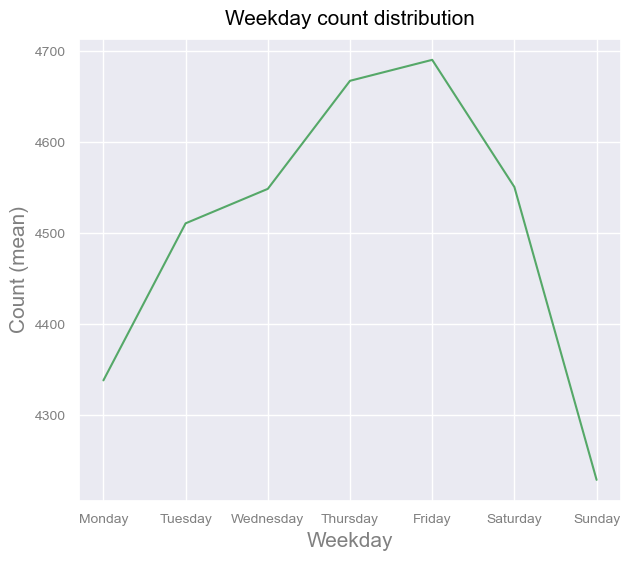

In [64]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.lineplot(
    data=dd,
    x=dd["weekday"].sort_values(),
    y="count",
    estimator="mean",
    errorbar=None,
    color="g",
    ax=ax,
)

plt.title("Weekday count distribution")
plt.ylabel("Count (mean)")
plt.xlabel("Weekday")
plt.show()

Text(0.5, 0, 'Weekday')

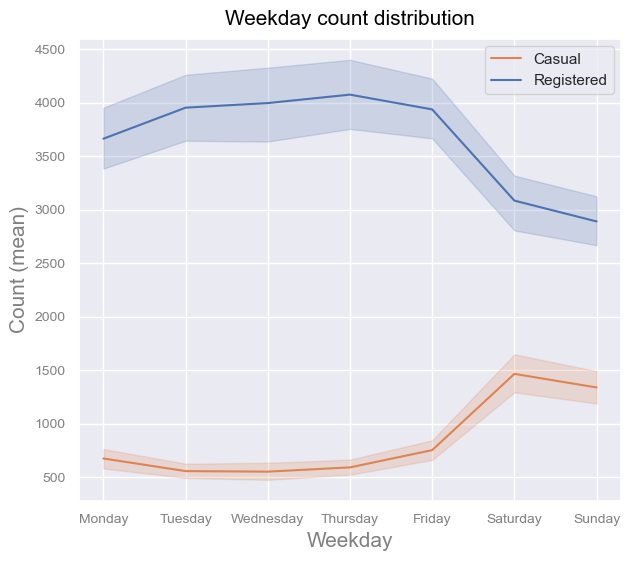

In [65]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.lineplot(
    data=dd,
    x=dd["weekday"].sort_values(),
    y="casual",
    label="Casual",
    estimator="mean",
    color="#dd8452",
    ax=ax,
)
sns.lineplot(
    data=dd,
    x=dd["weekday"].sort_values(),
    y="registered",
    label="Registered",
    estimator="mean",
    color="b",
    ax=ax,
)

plt.title("Weekday count distribution")
plt.ylabel("Count (mean)")
plt.xlabel("Weekday")
plt.show()

In [66]:
# Mean of the count during rainy and clear days

print(dd[dd['israin'] == True]['count'].mean())
print(dd[dd['israin'] == False]['count'].mean())


4297.282352941176
4684.406649616369


In [67]:
print(dd[dd['israin'] == True]['casual'].mean())
print(dd[dd['israin'] == False]['casual'].mean())
print(dd[dd['israin'] == True]['registered'].mean())
print(dd[dd['israin'] == False]['registered'].mean())

781.9852941176471
905.7340153452685
3515.2970588235294
3778.6726342711


In [68]:
# Mean of the count with and without snow

print(dd[dd['issnow'] == True]['count'].mean())
print(dd[dd['issnow'] == False]['count'].mean())

1685.3243243243244
4654.64265129683


In [69]:
print(dd[dd['issnow'] == True]['casual'].mean())
print(dd[dd['issnow'] == False]['casual'].mean())
print(dd[dd['issnow'] == True]['registered'].mean())
print(dd[dd['issnow'] == False]['registered'].mean())

139.67567567567568
885.949567723343
1545.6486486486488
3768.693083573487


In [75]:
def choose_plot(plot, data, prop, color, fig, ax):
    '''Function for choosing a plot and showing it'''
    if plot == "scatter":
        sns.scatterplot(data=data, x=prop, y="count", color=f'#{color[1:]}ff', size=0.5, ax=ax)
        ax.legend().remove()
        fig.suptitle("Features to Count Density", fontproperties={"size": 18})
    elif plot == "hist":
        bw = 0.5 if prop.name == 'snow' else 2.5
        sns.histplot(
            data=data,
            x=prop,
            weights="count",
            color=color,
            binwidth=bw,
            fill=True,
            ax=ax,
        )
        fig.suptitle("Features to Count", fontproperties={"size": 18})
        convert_to_k(ax)
    elif plot == "box":
        sns.boxplot(
            data=prop,
            ax=ax,
            color=color,
            saturation=1,
        )
        fig.suptitle("Features Distribution", fontproperties={"size": 20})
        fig.set_size_inches(7, 7)
    elif plot == "kde":
        sns.kdeplot(data=data, x=prop, weights="count", color=color, fill=True, ax=ax)
        fig.suptitle("Features to Count Density", fontproperties={"size": 18})

In [113]:
def plot_features(n, m, data, props, plot):
    '''Function for bulding a plot for every feature'''
    fig, ax = plt.subplots(n, m, figsize=(10, 6))

    for i in range(n):
        k = i * m if n > 1 else 0
        for j in range(m):
            axs = ax[i][j] if n > 1 else ax[j]
            prop = data[props[k + j]]
            color = colors_saturated[k + j]
            choose_plot(plot, data, prop, color, fig, axs)
            axs.set_ylabel('')
            axs.set_xlabel(f"{props[k+j]}")
        if plot in ['scatter', 'hist']:
                ax[i][0].set_ylabel("count")
        elif plot == "kde":
                ax[i][0].set_ylabel("density (count)")
    plt.tight_layout()

In [105]:
props = ["temp", "atemp", "hum", "windspeed", "rain", "snow"]
plots = ["box", "kde", "scatter", "hist"]

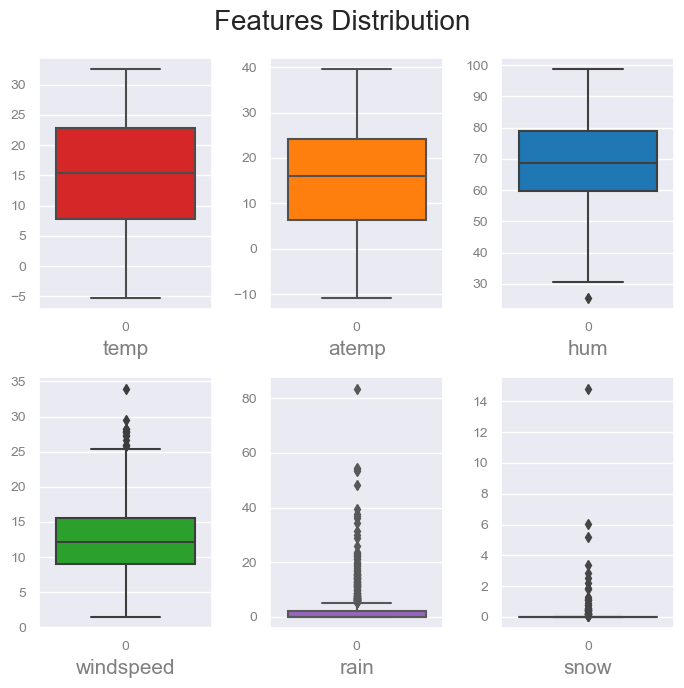

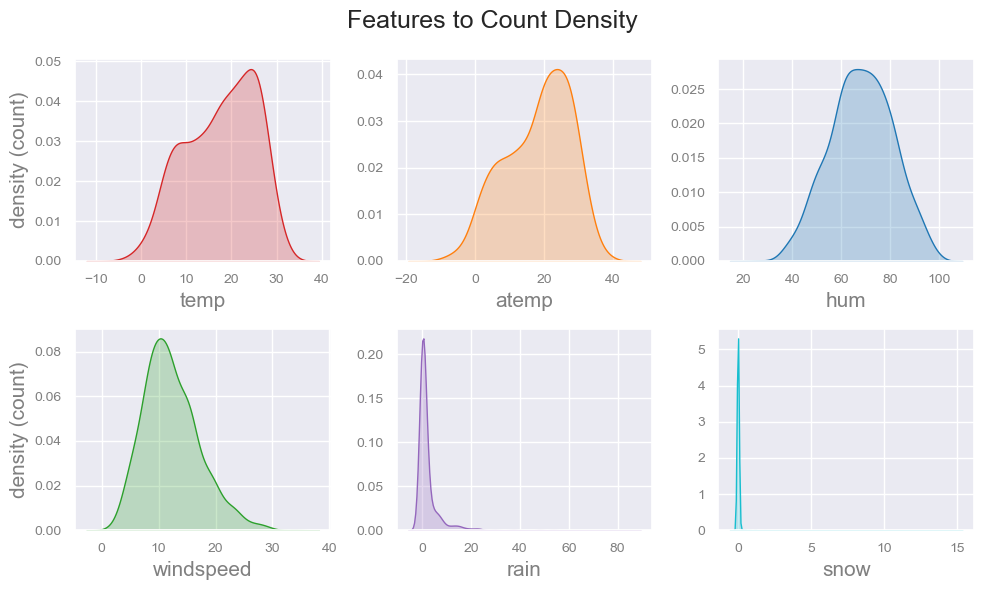

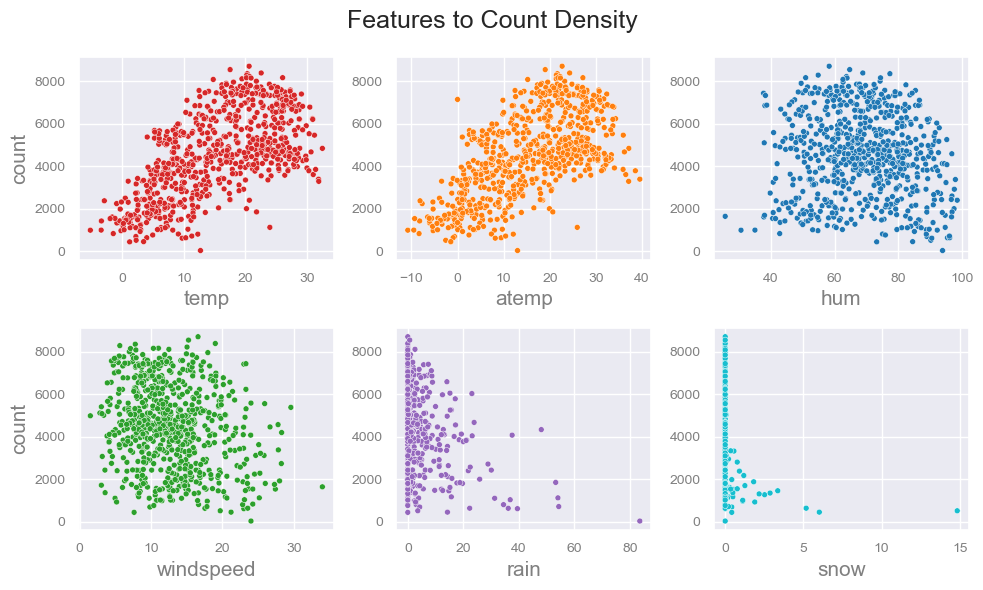

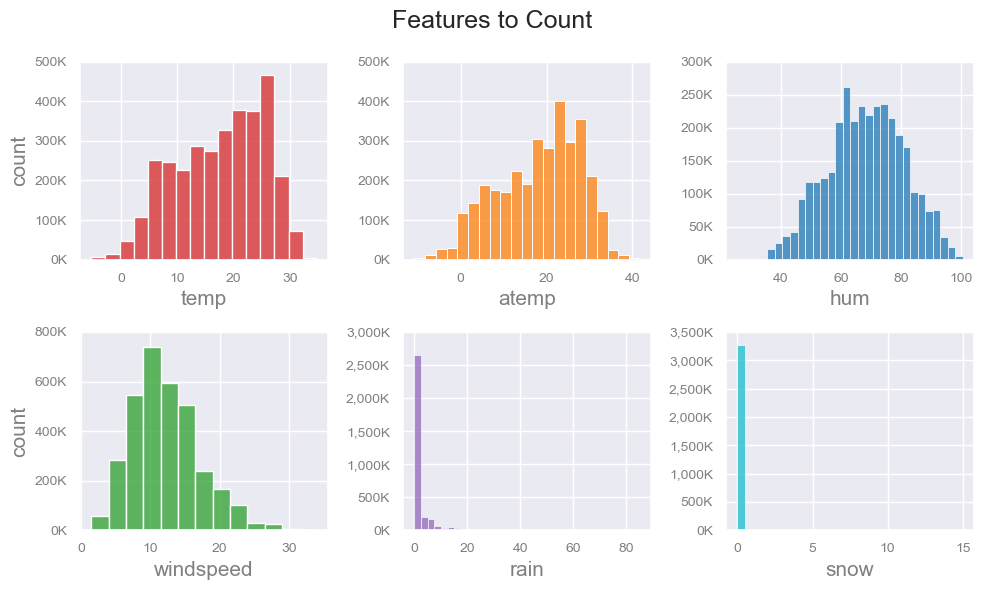

In [112]:
for plot in plots:
    plot_features(2, 3, dd, props, plot)

<Axes: >

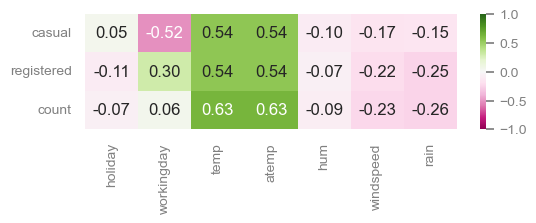

In [101]:
fig, ax = plt.subplots(figsize=(6, 1.5))

sns.heatmap(
        dd.corr(numeric_only=True).iloc[6:9, np.r_[0:6, 9:10]],  
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        vmin=-1,
        vmax=1,
)

<Axes: >

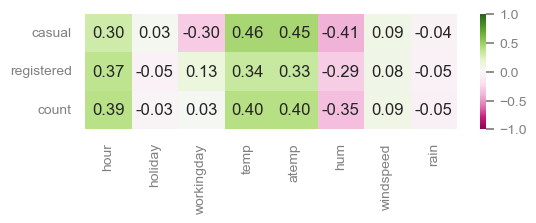

In [103]:
fig, ax = plt.subplots(figsize=(6, 1.5))

sns.heatmap(
        hd.corr(numeric_only=True).iloc[7:10, np.r_[0:7, 10:11]],  
        annot=True,
        fmt=".2f",
        cmap="PiYG",
        vmin=-1,
        vmax=1,
)